In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import r_
from scipy.stats.mstats import winsorize

In [ ]:
lg="/content/drive/MyDrive/car data.csv"

In [ ]:
df=pd.read_csv(lg)

In [ ]:
df


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

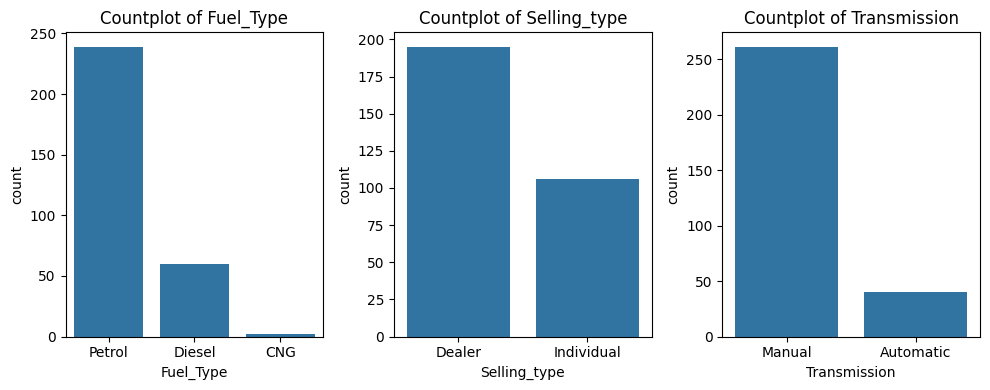

In [ ]:
# List of categorical columns to plot
cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

# Plotting using Seaborn's catplot
plt.figure(figsize=(10, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# List of categorical columns to plot
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']



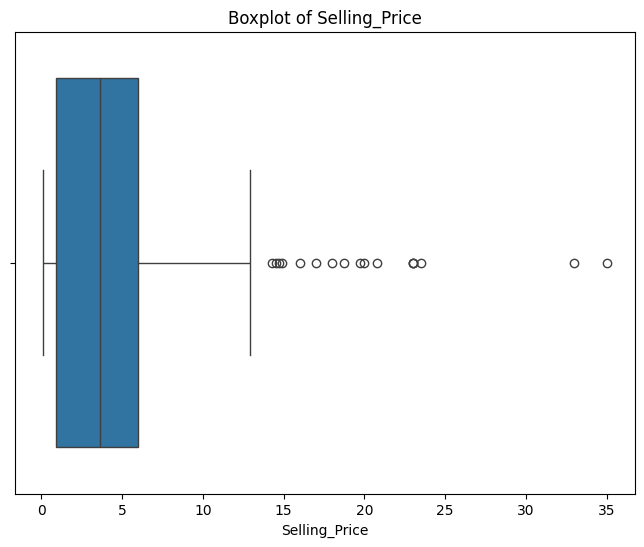

In [ ]:
# Plotting a boxplot for a single column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Selling_Price'])
plt.title('Boxplot of Selling_Price')
plt.xlabel('Selling_Price')
plt.show()

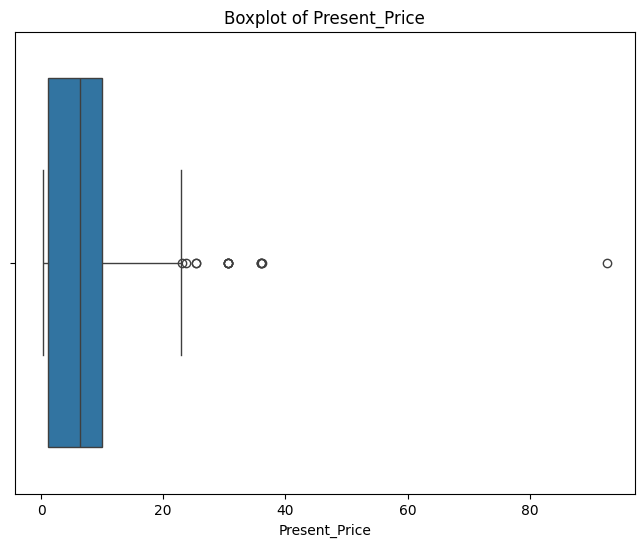

In [ ]:
# Plotting a boxplot for a single column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Present_Price'])
plt.title('Boxplot of Present_Price')
plt.xlabel('Present_Price')
plt.show()

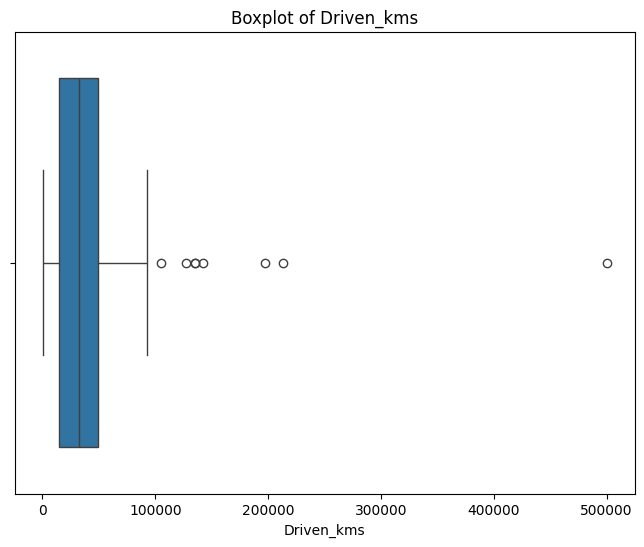

In [ ]:
# Plotting a boxplot for a single column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Driven_kms'])
plt.title('Boxplot of Driven_kms')
plt.xlabel('Driven_kms')
plt.show()

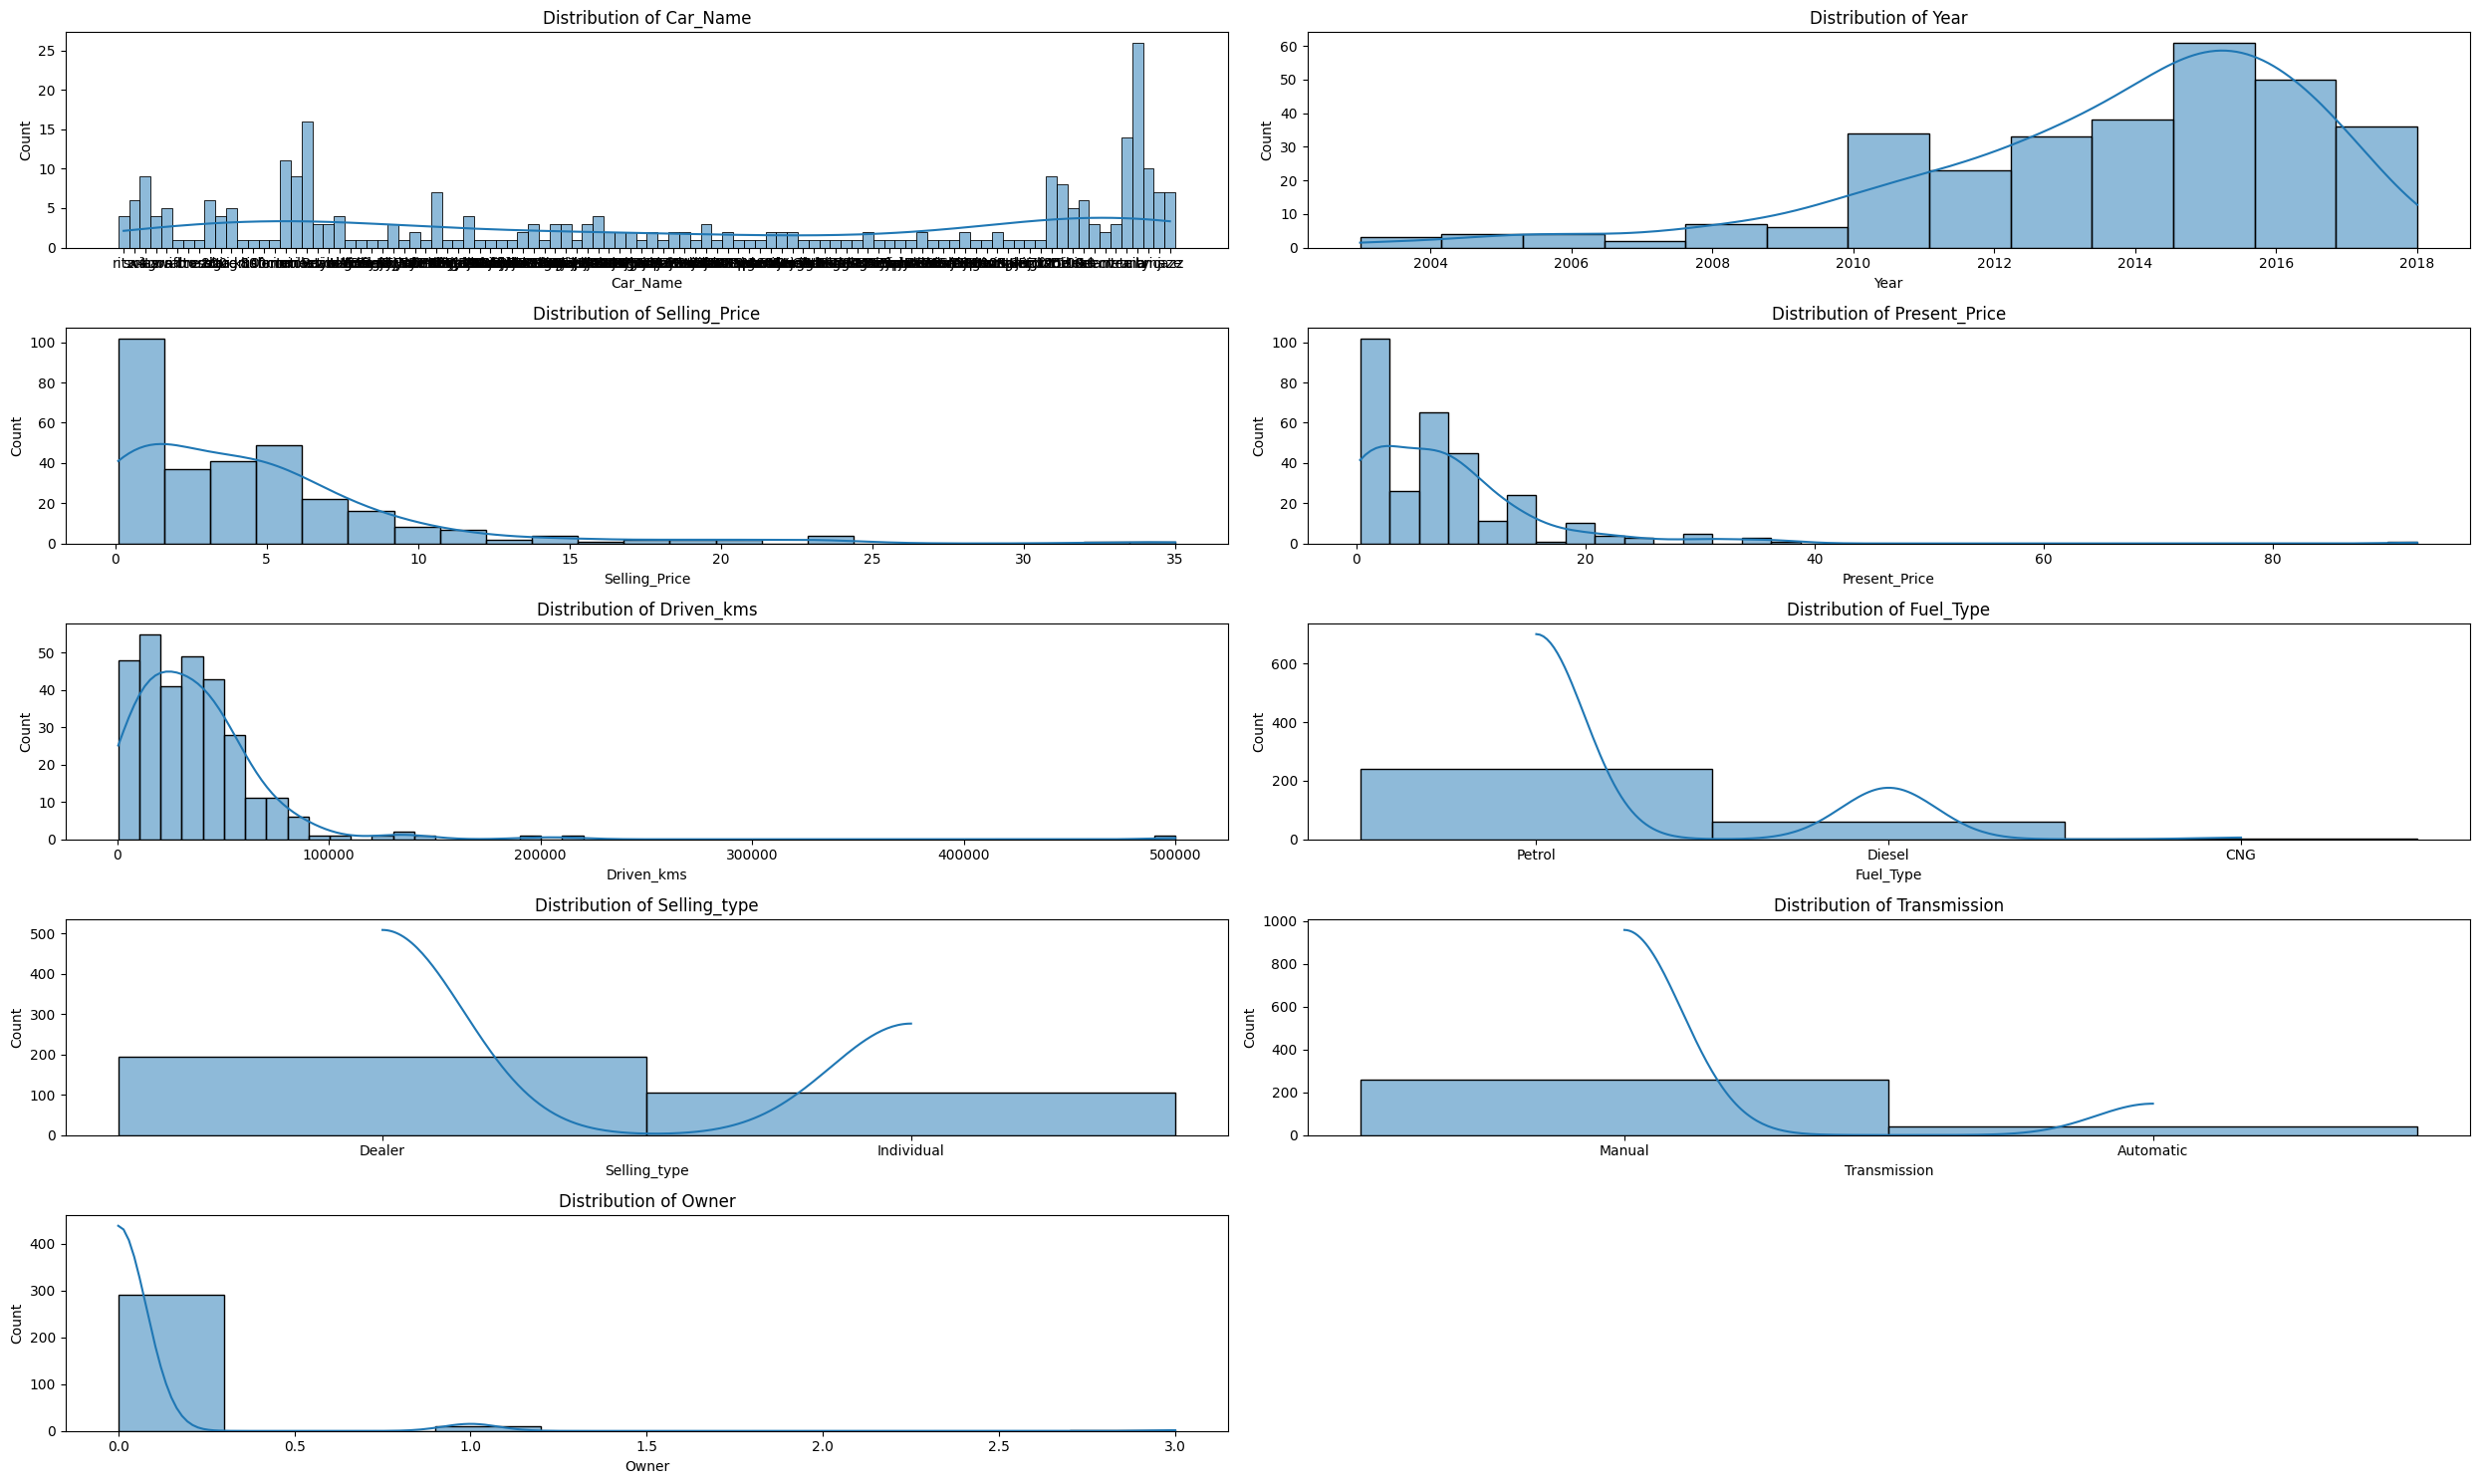

In [ ]:
num_cols = len(df.columns)
cols = 2  # Number of columns in the subplot grid
rows = (num_cols + cols - 1) // cols  # Calculate number of rows needed

# Plotting histograms for each numerical column
plt.figure(figsize=(25, 15))
for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [ ]:
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
#to convert all object columns we using label encoder
# Initialize LabelEncoders for each column
label_encoders = {}

# Convert each object column to integers
for col in object_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
#Removing outliers based on z-score
#from scipy import stats
#df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# Detect and treat outliers using winsorization for all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

print("DataFrame after treating outliers:")
print(df)




DataFrame after treating outliers:
     Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0          90  2014           3.35           5.59       27000          2   
1          93  2013           4.75           9.54       43000          1   
2          68  2017           7.25           9.85        6900          2   
3          94  2011           2.85           4.15        5200          2   
4          92  2014           4.60           6.87       42450          1   
..        ...   ...            ...            ...         ...        ...   
296        69  2016           9.50          11.60       33988          1   
297        66  2015           4.00           5.90       60000          2   
298        69  2009           3.35          11.00       80000          2   
299        69  2017          11.50          12.50        9000          1   
300        66  2016           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0          

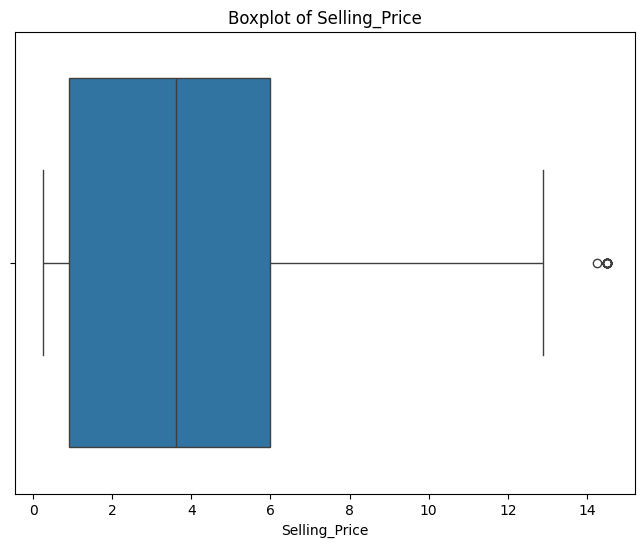

In [ ]:
# Plotting a boxplot for a single column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Selling_Price'])
plt.title('Boxplot of Selling_Price')
plt.xlabel('Selling_Price')
plt.show()

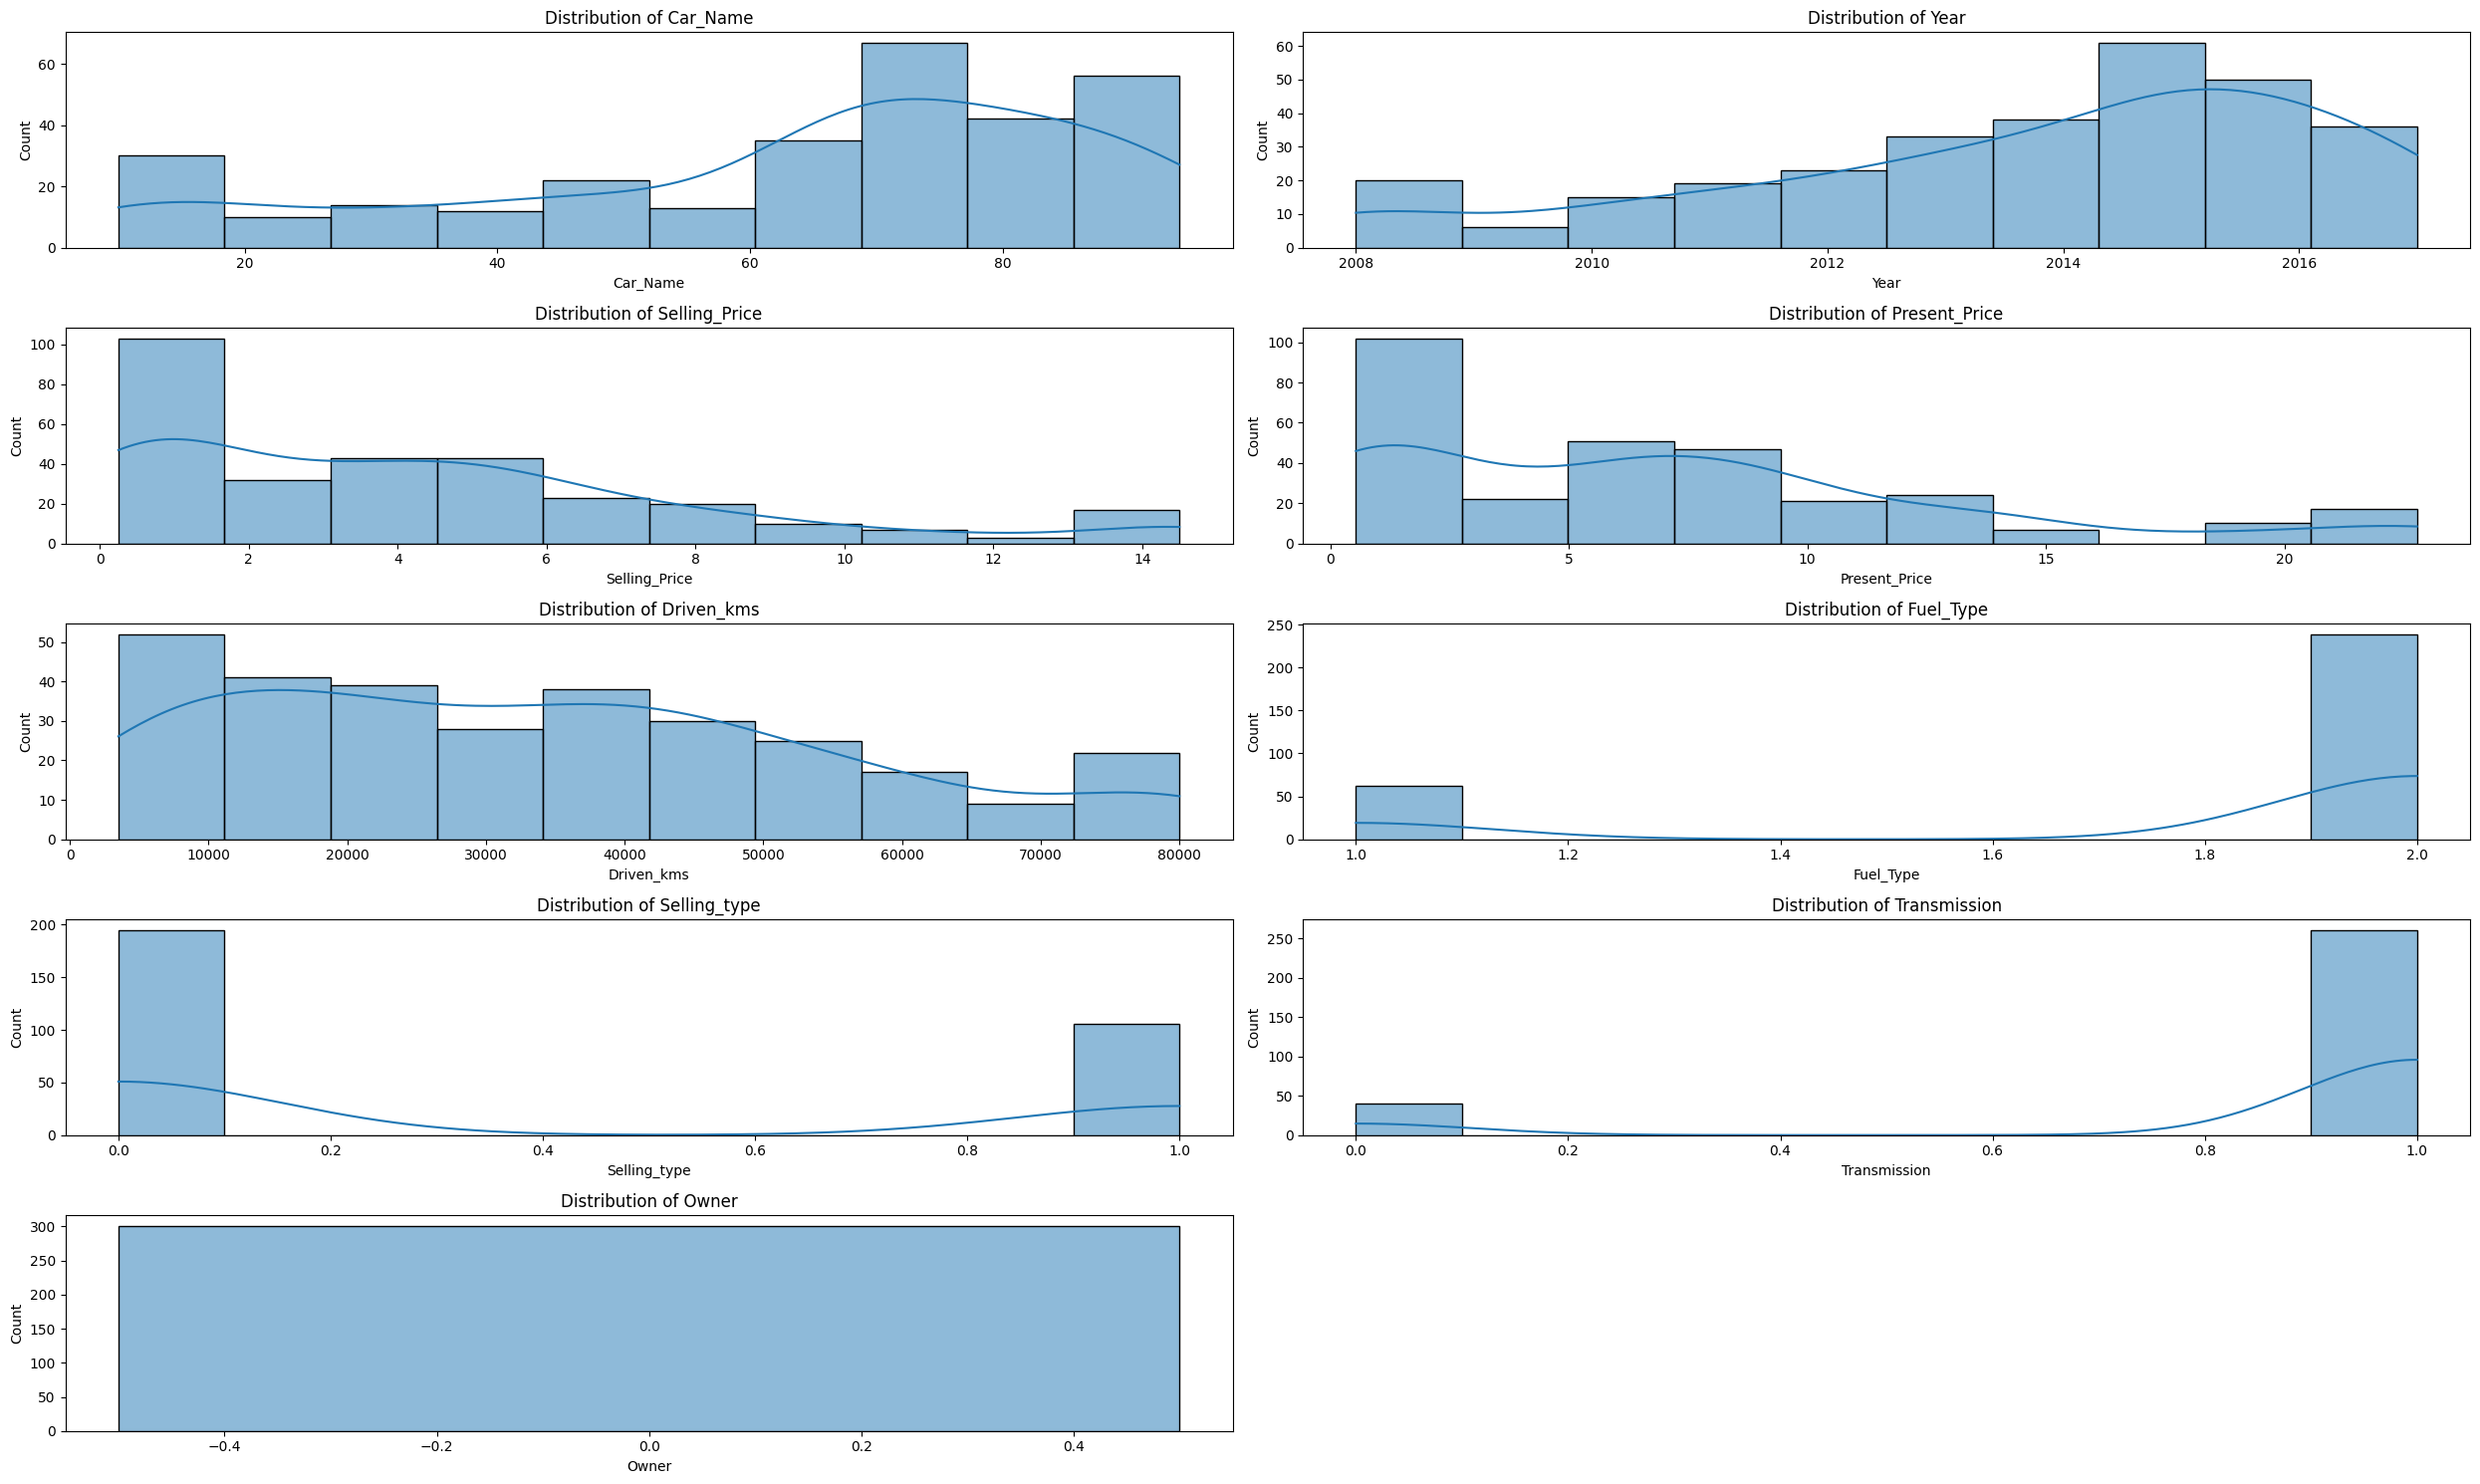

In [ ]:
num_cols = len(df.columns)
cols = 2  # Number of columns in the subplot grid
rows = (num_cols + cols - 1) // cols  # Calculate number of rows needed

# Plotting histograms for each numerical column
plt.figure(figsize=(25, 15))
for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

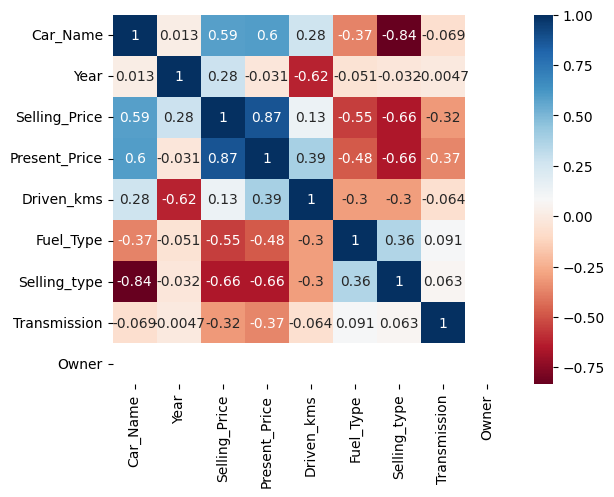

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()


In [ ]:
#df_car=df.drop(df['Owner'],axis=0,inplace=True)
# Drop rows where 'Car_Name' is 94
df_car = df[df['Car_Name'] != 94]
# Print the resulting DataFrame
print("\nDataFrame without 'Car_Name' 94:")
print(df_car)




DataFrame without 'Car_Name' 94:
     Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0          90  2014           3.35           5.59       27000          2   
1          93  2013           4.75           9.54       43000          1   
2          68  2017           7.25           9.85        6900          2   
4          92  2014           4.60           6.87       42450          1   
6          68  2015           6.75           8.12       18796          2   
..        ...   ...            ...            ...         ...        ...   
296        69  2016           9.50          11.60       33988          1   
297        66  2015           4.00           5.90       60000          2   
298        69  2009           3.35          11.00       80000          2   
299        69  2017          11.50          12.50        9000          1   
300        66  2016           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0           

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,94,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
# Define the target column
target_column = 'Selling_Price'


In [ ]:
# Separate features (X) and target (y)
x = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']


In [ ]:
x.head()

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,94,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
y.shape

(301,)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
model.coef_

array([-4.54381164e-03,  3.27157803e-01,  4.74203297e-01, -1.97580186e-05,
       -1.63267282e+00, -1.19682562e+00, -2.00482402e-01,  0.00000000e+00])

In [ ]:
model.intercept_

-653.390944070887

In [ ]:
model.predict(x_test)

array([ 6.81649929, -0.10239051,  4.20897857,  8.84173104, 13.54153264,
        5.11381573,  3.53135686,  1.57459635,  4.11827112,  4.70185553,
        2.416877  ,  1.83243484,  4.95346977,  6.67491442,  8.24776043,
       13.41524382,  6.23172133,  4.09991915, -0.41129187,  2.36313418,
        3.6459449 ,  4.95457169,  5.22755945,  8.36743488, -2.01417154,
        1.85060267, -1.34787338,  0.77882678,  0.32780772,  6.03008196,
        4.05527965,  7.10442047,  0.76320235,  7.83216514,  3.45735657,
        1.81784012,  5.63324448,  6.57208755, -1.3423989 ,  8.75228371,
        8.81833619, 13.49642173,  4.60781393,  4.61151083,  6.27298522,
        9.7380571 ,  0.04741105,  1.72833112,  5.0212603 ,  7.00778626,
        7.34358354,  4.20631802,  4.55203501, 13.70503142,  1.63409054,
        1.14373012,  0.48125295,  1.65494668,  2.98801016,  1.97045889,
        4.70006206,  5.97583619,  2.67621917, 15.16942579,  4.32043137,
        5.47978612,  8.70568896,  7.68056947,  2.1656517 ,  2.55

In [ ]:
#calculating mean square error
mse =  mean_absolute_error(y_test,y_pred)

In [ ]:
mse

0.855773057326411

In [ ]:
r2_score(y_test,y_pred)

0.915082943525707